In [1]:
%matplotlib inline
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from ipywidgets import interact, fixed

# Dirichlet

In [4]:
def plotweird(left=1,right=2*np.pi):
    #right = 4*np.pi
    x = np.linspace(left,right,10000)
    plt.plot(x,np.sin(1/x))
    plt.xlim(0,right)
interact(plotweird,left=(0,1,0.01),right=(0,2*np.pi,0.01))

interactive(children=(FloatSlider(value=1.0, description='left', max=1.0, step=0.01), FloatSlider(value=6.283185307179586, description='right', max=6.283185307179586, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.plotweird>

# And now let's play with the awesome function we defined from Fourier Transforms!

In [5]:
from scipy import integrate
from numpy import pi, sin, cos, linspace

In [7]:
integrate.quad?

In [6]:
print (integrate.quad(lambda x: sin(x), 0, 2*pi))
print (integrate.quad(lambda x: sin(x), 0, pi))

(2.221501482512777e-16, 4.3998892617845996e-14)
(2.0, 2.220446049250313e-14)


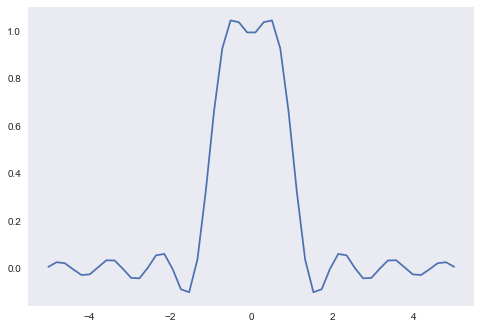

In [8]:
def f(x, toplim):
    def g(alpha): 
        return sin(alpha)*cos(alpha*x)/alpha
    return integrate.quad(g, 0, toplim)[0]*2/pi
# This says that the x values I care about go from -5 to 5, 
# and that there are 50 values to calculate inbetween.
xs = linspace(-5,5,50) 
# This says to calculate the integral going from 0 to 5
# (should be from 0 to infinity, but that would take a while)
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So that's kind of convincing ... I mean, we can see that it looks a bit like 0 outside the range we want ... but not terribly. Does it help to add more points in the middle?

In [ ]:
xs = linspace(-5,5,100) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

Nope. That just smooths out the ugliness. What does it look like farther away?

In [ ]:
xs = linspace(-20,20,200) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So, at least the ringing looks like it's dying off. What if we change the upper limit of the integral?

In [ ]:
xs = linspace(-5,5,100) 
y = [f(x,10) for x in xs]
plt.plot(xs,y)
plt.grid()

That's looking better. Let's keep doing it.

In [ ]:
xs = linspace(-5,5,100) 
y = [f(x,20) for x in xs]
plt.plot(xs,y)
plt.grid()

In [ ]:
xs = linspace(-5,5,100) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

Can we make sense of that? Well, remember that we evaluate `f` at a point by calculating

<pre><code>return integrate.quad(g, 0, toplim)[0]*2/pi</pre></code>

That is, `g(alpha)` gets integrated from `0` to `toplim`. So essentially we're looking at Parseval's theorem here. If we don't have the full spectrum (i.e. all of the $\alpha$'s), we can't reproduce our function!

How close are we to reproducing the function entirely? Well, not as close as we might like. Remember, the intiutive argument was that we had to make things continuous and integrate over all values of $\alpha$ to "stretch the period out to infinity," so the ringing gets kind of ugly:

In [ ]:
xs = linspace(-20,20,400) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

In [ ]:
xs = linspace(-20,20,4000) 
y = [f(x,20000) for x in xs]
plt.plot(xs,y)
plt.grid()

So part of the story there is that numerical methods is fully deserving of its own course. Errors accumulate in ways you aren't expecting, and you don't always get better answers by doing the "obvious" thing. Let's be happy with

In [ ]:
xs = linspace(-pi,pi,200) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

And now let's approximate a delta distribution. You'll recall

$\delta(x-a) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{i\alpha(x-a)}d\alpha$

but you'll also recall that the integral doesn't converge. Let's look at taking a limit.